In [1]:
import pandas as pd

In [2]:
data = pd.Series([1, 2, 3, 4], ['a', 'b', 'c', 'd'])

In [3]:
letters = ['x', 'b', 'c', 'd']

In [5]:
newData = pd.Series(data, letters)

In [7]:
pd.notnull(newData)

x    False
b     True
c     True
d     True
dtype: bool

In [8]:
import numpy as np

In [9]:
np.float

float

In [11]:
arr = np.arange(10)

In [13]:
arr.resize((2, 5))

In [14]:
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [15]:
np.ones([3, 3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [16]:
from numpy import nan as NA
df = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
df.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [17]:
obj = pd.Series([7, 6, 8, 9])

In [18]:
obj

0    7
1    6
2    8
3    9
dtype: int64

(note for string representation, index on left, val on right)

index is 1d array of labels

In [20]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [21]:
obj.values

array([7, 6, 8, 9])

In [30]:
colors = pd.Series(['#0000ff', '#ff0000', '#00ff00'], ['blue', 'red', 'green'] )

In [31]:
colors

blue     #0000ff
red      #ff0000
green    #00ff00
dtype: object

In [32]:
colors.values

array(['#0000ff', '#ff0000', '#00ff00'], dtype=object)

In [33]:
colors.index

Index(['blue', 'red', 'green'], dtype='object')

In [36]:
result = pd.Series([5, 6, 7], ['a', 'b', 'c'])

In [37]:
result

a    5
b    6
c    7
dtype: int64

In [38]:
result[result != 6]

a    5
c    7
dtype: int64

In [39]:
result[[True, False, True]]

a    5
c    7
dtype: int64

In [40]:
result

a    5
b    6
c    7
dtype: int64

In [41]:
'b' in result

True

In [48]:
fromdict = pd.Series({'foo': 1, 'bar': 2, 'baz': 3})

In [49]:
fromdict


foo    1
bar    2
baz    3
dtype: int64

In [50]:

fromdict2 = pd.Series({'foo': 1, 'bar': 2, 'baz': 3}, ['baz', 'bar', 'foo'])

In [51]:
fromdict2.index

Index(['baz', 'bar', 'foo'], dtype='object')

In [52]:
fromdict.index

Index(['foo', 'bar', 'baz'], dtype='object')

In [55]:
states = pd.Series({'CA': 100, 'NY':50, 'OR': 120}, index=['NY', 'NJ', 'CA'])

In [56]:
states

NY     50.0
NJ      NaN
CA    100.0
dtype: float64

NaN - marks missing of NA values

missing === NA
isnull or notnull to detect missing value
both as functions off of pd or as instance methods

In [57]:
pd.isnull(states)

NY    False
NJ     True
CA    False
dtype: bool

In [59]:
states.isnull()

NY    False
NJ     True
CA    False
dtype: bool

aligns by label for numeric ops

In [61]:
states + pd.Series([200, 200], ['NY', 'CA'])

CA    300.0
NJ      NaN
NY    250.0
dtype: float64

note, though, that comparison ops won't work

In [63]:
try:
    states  < pd.Series([200, 200], ['NY', 'CA'])
except ValueError:
    print('nope!')

nope!


In [65]:
states.name = 'states'

In [66]:
states.index.name = 'state names'

In [67]:
states

state names
NY     50.0
NJ      NaN
CA    100.0
Name: states, dtype: float64

assignment works

In [68]:
obj2 = pd.Series([5, 7, 1, 4])

In [69]:
obj2

0    5
1    7
2    1
3    4
dtype: int64

In [70]:
obj2.index = 'a', 'b', 'c', 'd'

In [71]:
obj2

a    5
b    7
c    1
d    4
dtype: int64

In [72]:
obj2['c'] = 100

In [73]:
obj2

a      5
b      7
c    100
d      4
dtype: int64

In [74]:
obj2['e'] = 200

In [75]:
obj2

a      5
b      7
c    100
d      4
e    200
dtype: int64

### DataFrame - table of data

* ordered collection of columns
* each col can be a differnt type (string, boolean)
* has index for both row and column
* maybe dict of series, w/ each series having the same index
  * dict keys are cols (columns) 
  * series are data in col
  * index for each series helps align "rows"
* data is not a collection of 1d arrays - but instead a bunch of 2d blocks (so not like our implementation)

In [76]:
d = {'state': ['NY', 'NY', 'NY', 'CA', 'CA', 'CA'],
    'year': [2000, 2001, 2002, 2001, 2002, 2003], 
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [77]:
df = pd.DataFrame(d)

In [78]:
df

,state,year,pop
0,NY,2000,1.5
1,NY,2001,1.7
2,NY,2002,3.6
3,CA,2001,2.4
4,CA,2002,2.9
5,CA,2003,3.2


In [79]:
df.head()

,state,year,pop
0,NY,2000,1.5
1,NY,2001,1.7
2,NY,2002,3.6
3,CA,2001,2.4
4,CA,2002,2.9


In [81]:
pd.DataFrame(d, columns=['pop', 'year', 'state'])

,pop,year,state
0,1.5,2000,NY
1,1.7,2001,NY
2,3.6,2002,NY
3,2.4,2001,CA
4,2.9,2002,CA
5,3.2,2003,CA


if col specified doesn't exist... all missing values
can also repeat

In [82]:
pd.DataFrame(d, columns=['pop', 'year', 'state' 'foo', 'state'])

,pop,year,statefoo,state
0,1.5,2000,NaN,NY
1,1.7,2001,NaN,NY
2,3.6,2002,NaN,NY
3,2.4,2001,NaN,CA
4,2.9,2002,NaN,CA
5,3.2,2003,NaN,CA


use dot or brackets to retrieve column as a series

In [83]:
df['pop']

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pop, dtype: float64

In [84]:
df.state

0    NY
1    NY
2    NY
3    CA
4    CA
5    CA
Name: state, dtype: object

only works if col name is valid variable
tab completion worx!

In [85]:
df.state

0    NY
1    NY
2    NY
3    CA
4    CA
5    CA
Name: state, dtype: object

rows can be retrieved w/ .loc

In [86]:
df.loc[2]

state      NY
year     2002
pop       3.6
Name: 2, dtype: object

cols can be modified by assignment - assigns same value for every row in new col df[col_name] = val

In [90]:
df

,state,year,pop,foo
0,NY,2000,1.5,23
1,NY,2001,1.7,23
2,NY,2002,3.6,23
3,CA,2001,2.4,23
4,CA,2002,2.9,23
5,CA,2003,3.2,23


In [91]:
df['foo'] = 23

In [89]:
df

,state,year,pop,foo
0,NY,2000,1.5,23
1,NY,2001,1.7,23
2,NY,2002,3.6,23
3,CA,2001,2.4,23
4,CA,2002,2.9,23
5,CA,2003,3.2,23


if list or array, lengths must match

In [92]:
df.foo = np.arange(6)

In [93]:
df

,state,year,pop,foo
0,NY,2000,1.5,0
1,NY,2001,1.7,1
2,NY,2002,3.6,2
3,CA,2001,2.4,3
4,CA,2002,2.9,4
5,CA,2003,3.2,5


del will delete

In [94]:
del df['foo']

In [96]:
df

,state,year,pop
0,NY,2000,1.5
1,NY,2001,1.7
2,NY,2002,3.6
3,CA,2001,2.4
4,CA,2002,2.9
5,CA,2003,3.2


nested dicts work to init a df


In [98]:
df2 = pd.DataFrame({'col1': {'row1': 2, 'row2': 6}, 'col2': {'row1': 12, 'row4':14}})

In [99]:
df2

,col1,col2
row1,2.0,12.0
row2,6.0,NaN
row4,NaN,14.0


In [100]:
df2.values

array([[ 2., 12.],
       [ 6., nan],
       [nan, 14.]])

In [101]:
df2.index

Index(['row1', 'row2', 'row4'], dtype='object')

index can be initialized with array or other sequence
df2.columns

In [102]:
df2.columns

Index(['col1', 'col2'], dtype='object')

index is liked fixed size set, but can have duplicates - see set ops like union, intersection, etc.
holds axis labels
index objects are immutable

In [105]:
df2.columns.union(['col1', 'col3'])

Index(['col1', 'col2', 'col3'], dtype='object')

In [106]:
df2.columns.intersection(['col1', 'col3'])

Index(['col1'], dtype='object')

reindexing

In [108]:
obj = pd.Series([4.2, 7.1, -1, 3], index=['d', 'b', 'a', 'c'])

In [109]:
obj

d    4.2
b    7.1
a   -1.0
c    3.0
dtype: float64

In [111]:
# reindex reaaranges data based on new index, 
# includes duplicates, can add new (set tp NaN)
obj.reindex(['b', 'b', 'a', 'e'])

b    7.1
b    7.1
a   -1.0
e    NaN
dtype: float64

In [112]:
obj2 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [113]:
obj2

0      blue
2    purple
4    yellow
dtype: object

In [115]:
obj2.reindex(np.arange(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

ffill means forward fill the values
* alter row index
* columns
* both

In [118]:
f = pd.DataFrame(np.arange(9).reshape((3, 3)), index=list('acd'), columns=['oh', 'tx', 'ca'])

In [119]:
f

,oh,tx,ca
a,0,1,2
c,3,4,5
d,6,7,8


In [120]:
f.reindex(list('xyzacc'))

,oh,tx,ca
x,NaN,NaN,NaN
y,NaN,NaN,NaN
z,NaN,NaN,NaN
a,0.0,1.0,2.0
c,3.0,4.0,5.0
c,3.0,4.0,5.0


In [121]:
f.reindex(columns=['ca', 'nj', 'oh'])

,ca,nj,oh
a,2,NaN,0
c,5,NaN,3
d,8,NaN,6


also, reindex with loc

In [125]:
f

,oh,tx,ca
a,0,1,2
c,3,4,5
d,6,7,8


In [127]:
f.loc[list('dca'), ['ca', 'tx', 'oh']]

,ca,tx,oh
d,8,7,6
c,5,4,3
a,2,1,0


In [129]:
np.arange(5.0, 7.0, 0.2)

array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8])

axis 0 is rows 
axis 1 is cols
drop will drop axis 0 (rows)

In [130]:
f

,oh,tx,ca
a,0,1,2
c,3,4,5
d,6,7,8


In [131]:
f.drop(list('dc'))

,oh,tx,ca
a,0,1,2


In [132]:
f

,oh,tx,ca
a,0,1,2
c,3,4,5
d,6,7,8


In [134]:
f.drop(['oh', 'ca'], axis=1)

,tx
a,1
c,4
d,7


In [136]:

f.drop(['oh', 'ca'], axis='columns')

,tx
a,1
c,4
d,7


use inplace=True to modify in place / mutate df
inplace deletes dropped data

In [138]:
df3 = pd.DataFrame(np.arange(16).reshape((4,4)), columns=list('abcd'), index=['foo', 'bar', 'baz', 'qux'])

In [139]:
df3

,a,b,c,d
foo,0,1,2,3
bar,4,5,6,7
baz,8,9,10,11
qux,12,13,14,15


same as numpy indexing. series index values instead of only integers

In [142]:
s = pd.Series(np.arange(4), index=list('abcd'))

In [143]:
s

a    0
b    1
c    2
d    3
dtype: int64

In [144]:
s['a']

0

In [145]:
s['b']

1

In [146]:
s[0]

0

In [147]:
s[1:3]

b    1
c    2
dtype: int64

In [148]:
s[['b', 'a', 'a']]

b    1
a    0
a    0
dtype: int64

slicing endpoints are inclusive if using labels rather than indexing

In [149]:
s['b':'c']

b    1
c    2
dtype: int64

In [150]:

s['b':'c'] = 200

In [151]:
s

a      0
b    200
c    200
d      3
dtype: int64

index into df to get col

In [152]:
df3

,a,b,c,d
foo,0,1,2,3
bar,4,5,6,7
baz,8,9,10,11
qux,12,13,14,15


In [154]:
df3['a']

foo     0
bar     4
baz     8
qux    12
Name: a, dtype: int64

In [156]:
df3[['a', 'b']]

,a,b
foo,0,1
bar,4,5
baz,8,9
qux,12,13


In [157]:
df3[:2]

,a,b,c,d
foo,0,1,2,3
bar,4,5,6,7


ugh. slice gets rows, single element or list of elements gets columns

In [159]:
df3

,a,b,c,d
foo,0,1,2,3
bar,4,5,6,7
baz,8,9,10,11
qux,12,13,14,15


In [160]:
df3 < 6

,a,b,c,d
foo,True,True,True,True
bar,True,True,False,False
baz,False,False,False,False
qux,False,False,False,False


In [161]:
df3[df3 < 6]

,a,b,c,d
foo,0.0,1.0,2.0,3.0
bar,4.0,5.0,NaN,NaN
baz,NaN,NaN,NaN,NaN
qux,NaN,NaN,NaN,NaN


when passing boolean df, NaN is given for False values
when assignment... can assign to whole sections

In [162]:
df3[df3 < 6] = -1

In [163]:
df3

,a,b,c,d
foo,-1,-1,-1,-1
bar,-1,-1,6,7
baz,8,9,10,11
qux,12,13,14,15


In [166]:
arr = np.arange(16).reshape((4, 4))

In [167]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [168]:
arr[arr < 6]

array([0, 1, 2, 3, 4, 5])

loc vs iloc

* both can index on rows
* numpy like notation
* loc uses axis labels
* iloc uses integers

In [170]:
df3

,a,b,c,d
foo,-1,-1,-1,-1
bar,-1,-1,6,7
baz,8,9,10,11
qux,12,13,14,15


In [172]:
df3.loc['foo', ['a', 'c']]

a   -1
c   -1
Name: foo, dtype: int64

In [175]:
df3['a']

foo    -1
bar    -1
baz     8
qux    12
Name: a, dtype: int64

In [176]:
df3.loc['bar': 'qux', :'c']

,a,b,c
bar,-1,-1,6
baz,8,9,10
qux,12,13,14


if axis index contains ints, data selections is label oriented... or use loc for labels or iloc for integers

In [180]:
s2 =  pd.Series(np.arange(3))

In [184]:
try:
    s2[-1]
except KeyError:
    print('key error!')

key error!


In [185]:
s2

0    0
1    1
2    2
dtype: int64

In [186]:
s2.iloc[-1]

2

series arithmetic - align on index
new index is union of index from a and b

In [188]:
a = pd.Series(np.arange(5), index=list('abcde'))
b = pd.Series(np.arange(5), index=list('edcxy'))

In [189]:
a

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [190]:
b

e    0
d    1
c    2
x    3
y    4
dtype: int64

In [191]:
a + b

a    NaN
b    NaN
c    4.0
d    4.0
e    4.0
x    NaN
y    NaN
dtype: float64

with df, align on both index and columns

In [193]:
dfa = pd.DataFrame(np.arange(9).reshape((3, 3)), 
                  index=[f'row{i}' for i in range(3)],
                  columns=[f'col{i}' for i in range(3)])

In [194]:
dfa

,col0,col1,col2
row0,0,1,2
row1,3,4,5
row2,6,7,8


In [197]:
dfb = pd.DataFrame(np.arange(0, -9, -1).reshape((3, 3)), 
                  index=[f'row{i}' for i in range(2, 5)],
                  columns=[f'col{i}' for i in range(1, 4)])

In [198]:
dfb

,col1,col2,col3
row2,0,-1,-2
row3,-3,-4,-5
row4,-6,-7,-8


In [199]:
dfa

,col0,col1,col2
row0,0,1,2
row1,3,4,5
row2,6,7,8


In [200]:
dfa + dfb

,col0,col1,col2,col3
row0,NaN,NaN,NaN,NaN
row1,NaN,NaN,NaN,NaN
row2,NaN,7.0,7.0,NaN
row3,NaN,NaN,NaN,NaN
row4,NaN,NaN,NaN,NaN


In [202]:
dfa.add(dfb, fill_value=0)

,col0,col1,col2,col3
row0,0.0,1.0,2.0,NaN
row1,3.0,4.0,5.0,NaN
row2,6.0,7.0,7.0,-2.0
row3,NaN,-3.0,-4.0,-5.0
row4,NaN,-6.0,-7.0,-8.0


w/ df and series match is done using by df columns and series index
(broadcasting)

In [203]:
dfa

,col0,col1,col2
row0,0,1,2
row1,3,4,5
row2,6,7,8


In [204]:
dfa - pd.Series([-1, -10, -100], index=['col0', 'col1', 'col2'])

,col0,col1,col2
row0,1,11,102
row1,4,14,105
row2,7,17,108


if diff cols v index, reindex will occur bringing together cols from df and index from series (union)

In [205]:
dfa - pd.Series([-1, -10, -100], index=['col1', 'col2', 'col3'])

,col0,col1,col2,col3
row0,NaN,2.0,12.0,NaN
row1,NaN,5.0,15.0,NaN
row2,NaN,8.0,18.0,NaN


axis can be passed in to determine which axis to match on

default axis matches on axis 1 or columns... so goes down by row
to go across columns, axis must be index(row) or axis 0 and go across

In [211]:
dfa.add(pd.Series([-1, -10, -100], index=['row0', 'row1', 'row2']), axis=0)

,col0,col1,col2
row0,-1,0,1
row1,-7,-6,-5
row2,-94,-93,-92


applymap is element wise on df (all elements)
...same w/ other numpy ufuncs, like abs, pow, etc.

In [212]:
dfa

,col0,col1,col2
row0,0,1,2
row1,3,4,5
row2,6,7,8


In [213]:
dfa.pow(2)

,col0,col1,col2
row0,0,1,4
row1,9,16,25
row2,36,49,64


In [214]:
dfa

,col0,col1,col2
row0,0,1,2
row1,3,4,5
row2,6,7,8


In [217]:
dfa.applymap(lambda n: n + 1 if n % 2 == 1 else n)

,col0,col1,col2
row0,0,2,2
row1,4,4,6
row2,6,8,8


In [218]:
dfa.apply(lambda arr: max(arr) - min(arr), axis=0)

col0    6
col1    6
col2    6
dtype: int64

In [219]:
dfa.apply(lambda arr: max(arr) - min(arr), axis=1)

row0    2
row1    2
row2    2
dtype: int64

In [220]:
dfa.sum()

col0     9
col1    12
col2    15
dtype: int64

In [221]:
dfa

,col0,col1,col2
row0,0,1,2
row1,3,4,5
row2,6,7,8


In [222]:
dfa.sum(axis=1)

row0     3
row1    12
row2    21
dtype: int64

In [231]:
dfc = dfa.reindex(index=['row2', 'row0', 'row1'])

In [232]:
dfc

,col0,col1,col2
row2,6,7,8
row0,0,1,2
row1,3,4,5


In [233]:
dfc.sort_values('col0')

,col0,col1,col2
row0,0,1,2
row1,3,4,5
row2,6,7,8


In [234]:
dfc[3] = 9, 10, -1

In [235]:
dfc

,col0,col1,col2,3
row2,6,7,8,9
row0,0,1,2,10
row1,3,4,5,-1


In [239]:
df = pd.DataFrame([[4, 5, 6], [7, 8, 9]],
    index=['r1', 'r2'],
    columns=['foo', 'bar', 'baz'])

In [237]:
df['foo'] = pd.Series([100, 200], ['r1', 'r3'])

In [238]:
df

,foo,bar,baz
r1,100.0,5,6
r2,NaN,8,9


In [240]:
dfa

,col0,col1,col2
row0,0,1,2
row1,3,4,5
row2,6,7,8


In [241]:
dfa.reindex(['row2', 'row0', 'row1'], columns=['col2', 'col1', 'col0'])

,col2,col1,col0
row2,8,7,6
row0,2,1,0
row1,5,4,3


In [251]:
d = [["$229.2", 2017, 123000, "$1100", "Cupertino, US"],
     ["$211.9", 2017, 320671, "$284", "Suwon, South Korea"],
     ["$177.8", 2017, 566000, "$985",  "Seattle, US"],
     ["$154.7", 2017, 1300000, "$66", "New Taipei City, Taiwan"],
     ["$110.8", 2017, 80110, "$834", "Mountain View, US"]]

comps = ["apple", "samsung", "amazon", "foxconn", "alphabet"]
cols = ["revenue", "fy", "employees", "mcap", "location"]

c = pd.DataFrame(d, index=comps, columns=cols)

In [249]:
c.drop(['fy', 'mcap'], axis=1) # , inplace=True

In [252]:
c

,revenue,fy,employees,mcap,location
apple,$229.2,2017,123000,$1100,"Cupertino, US"
samsung,$211.9,2017,320671,$284,"Suwon, South Korea"
amazon,$177.8,2017,566000,$985,"Seattle, US"
foxconn,$154.7,2017,1300000,$66,"New Taipei City, Taiwan"
alphabet,$110.8,2017,80110,$834,"Mountain View, US"


In [253]:
del c['fy']

In [254]:
del c['mcap']

In [255]:
c

,revenue,employees,location
apple,$229.2,123000,"Cupertino, US"
samsung,$211.9,320671,"Suwon, South Korea"
amazon,$177.8,566000,"Seattle, US"
foxconn,$154.7,1300000,"New Taipei City, Taiwan"
alphabet,$110.8,80110,"Mountain View, US"


In [256]:
c['employees']

apple        123000
samsung      320671
amazon       566000
foxconn     1300000
alphabet      80110
Name: employees, dtype: int64

In [257]:
c['employees']['amazon':'amazon']

amazon    566000
Name: employees, dtype: int64

In [258]:
c['employees']['amazon']

566000

In [260]:
c.loc['amazon', 'revenue']

'$177.8'

In [268]:
c['state'] = pd.Series({'amazon': 'WA', 'alphabet': 'CA', 'apple': 'CA'})

In [269]:
c

,revenue,employees,location,state
apple,$229.2,123000,"Cupertino, US",CA
samsung,$211.9,320671,"Suwon, South Korea",NaN
amazon,$177.8,566000,"Seattle, US",WA
foxconn,$154.7,1300000,"New Taipei City, Taiwan",NaN
alphabet,$110.8,80110,"Mountain View, US",CA


In [270]:
c['employees']

apple        123000
samsung      320671
amazon       566000
foxconn     1300000
alphabet      80110
Name: employees, dtype: int64

In [271]:
c['employees'] / 100000

apple        1.23000
samsung      3.20671
amazon       5.66000
foxconn     13.00000
alphabet     0.80110
Name: employees, dtype: float64

In [273]:
c[c['employees'] < 200000]

,revenue,employees,location,state
apple,$229.2,123000,"Cupertino, US",CA
alphabet,$110.8,80110,"Mountain View, US",CA


In [274]:
c['state'].isnull()

apple       False
samsung      True
amazon      False
foxconn      True
alphabet    False
Name: state, dtype: bool

In [275]:
c[c['state'].isnull()]

,revenue,employees,location,state
samsung,$211.9,320671,"Suwon, South Korea",NaN
foxconn,$154.7,1300000,"New Taipei City, Taiwan",NaN


In [277]:

c[c['state'].notnull()]

,revenue,employees,location,state
apple,$229.2,123000,"Cupertino, US",CA
amazon,$177.8,566000,"Seattle, US",WA
alphabet,$110.8,80110,"Mountain View, US",CA


In [278]:
c['state'] = c['state'].fillna('')

In [279]:
c

,revenue,employees,location,state
apple,$229.2,123000,"Cupertino, US",CA
samsung,$211.9,320671,"Suwon, South Korea",
amazon,$177.8,566000,"Seattle, US",WA
foxconn,$154.7,1300000,"New Taipei City, Taiwan",
alphabet,$110.8,80110,"Mountain View, US",CA


In [280]:
c['location'] = c['location'].str.upper()

In [281]:
c

,revenue,employees,location,state
apple,$229.2,123000,"CUPERTINO, US",CA
samsung,$211.9,320671,"SUWON, SOUTH KOREA",
amazon,$177.8,566000,"SEATTLE, US",WA
foxconn,$154.7,1300000,"NEW TAIPEI CITY, TAIWAN",
alphabet,$110.8,80110,"MOUNTAIN VIEW, US",CA


In [283]:
c['country'] = c['location'].str.split(',').str[-1]

In [284]:
c

,revenue,employees,location,state,country
apple,$229.2,123000,"CUPERTINO, US",CA,US
samsung,$211.9,320671,"SUWON, SOUTH KOREA",,SOUTH KOREA
amazon,$177.8,566000,"SEATTLE, US",WA,US
foxconn,$154.7,1300000,"NEW TAIPEI CITY, TAIWAN",,TAIWAN
alphabet,$110.8,80110,"MOUNTAIN VIEW, US",CA,US


In [285]:
c.index

Index(['apple', 'samsung', 'amazon', 'foxconn', 'alphabet'], dtype='object')

In [288]:
c.reindex(list(c.index[1:]) + ['apple'])

,revenue,employees,location,state,country
samsung,$211.9,320671,"SUWON, SOUTH KOREA",,SOUTH KOREA
amazon,$177.8,566000,"SEATTLE, US",WA,US
foxconn,$154.7,1300000,"NEW TAIPEI CITY, TAIWAN",,TAIWAN
alphabet,$110.8,80110,"MOUNTAIN VIEW, US",CA,US
apple,$229.2,123000,"CUPERTINO, US",CA,US


In [289]:
c.reindex(list(c.index[1:]) + ['apple'], columns=['revenue', 'employees', 'state', 'location', 'country'])

,revenue,employees,state,location,country
samsung,$211.9,320671,,"SUWON, SOUTH KOREA",SOUTH KOREA
amazon,$177.8,566000,WA,"SEATTLE, US",US
foxconn,$154.7,1300000,,"NEW TAIPEI CITY, TAIWAN",TAIWAN
alphabet,$110.8,80110,CA,"MOUNTAIN VIEW, US",US
apple,$229.2,123000,CA,"CUPERTINO, US",US


In [290]:
a = [1, 2, 3]
b = [4, 5, 6]

In [291]:
[*a, *b]

[1, 2, 3, 4, 5, 6]

In [292]:
c.reindex([*list(c.index[1:]), 'apple', 'microsoft'], columns=['revenue', 'employees', 'state', 'location', 'country'])

,revenue,employees,state,location,country
samsung,$211.9,320671.0,,"SUWON, SOUTH KOREA",SOUTH KOREA
amazon,$177.8,566000.0,WA,"SEATTLE, US",US
foxconn,$154.7,1300000.0,,"NEW TAIPEI CITY, TAIWAN",TAIWAN
alphabet,$110.8,80110.0,CA,"MOUNTAIN VIEW, US",US
apple,$229.2,123000.0,CA,"CUPERTINO, US",US
microsoft,NaN,NaN,NaN,NaN,NaN


In [293]:

c2 = c.reindex([*list(c.index[1:]), 'apple', 'microsoft'], columns=['revenue', 'employees', 'state', 'location', 'country'])

In [294]:
rain = pd.DataFrame([[3.50, 4.53, 4.13, 3.98],
                     [7.91, 5.98, 6.10, 5.12],
                     [3.94, 5.28, 3.90, 4.49],
                     [1.42, 0.63, 0.75, 1.65]],
    index=['New York', 'New Orleans', 'Atlanta', 'Seattle'],
    columns=['Jun', 'Jul', 'Aug', 'Sept'])

In [295]:
rain

,Jun,Jul,Aug,Sept
New York,3.50,4.53,4.13,3.98
New Orleans,7.91,5.98,6.10,5.12
Atlanta,3.94,5.28,3.90,4.49
Seattle,1.42,0.63,0.75,1.65


In [296]:
rain.apply(lambda month: sum(month))

Jun     16.77
Jul     16.42
Aug     14.88
Sept    15.24
dtype: float64

In [297]:
rain.apply(lambda city: sum(city), axis=1)

New York       16.14
New Orleans    25.11
Atlanta        17.61
Seattle         4.45
dtype: float64

In [298]:
rain.min(axis=1)

New York       3.50
New Orleans    5.12
Atlanta        3.90
Seattle        0.63
dtype: float64

In [299]:
def factorial(n):
    return 1 if n == 0 else n * factorial(n - 1)

In [300]:
nums = pd.DataFrame(np.arange(9).reshape((3, 3)))
nums.applymap(factorial)

,0,1,2
0,1,1,2
1,6,24,120
2,720,5040,40320


In [301]:
rain.round(1)

,Jun,Jul,Aug,Sept
New York,3.5,4.5,4.1,4.0
New Orleans,7.9,6.0,6.1,5.1
Atlanta,3.9,5.3,3.9,4.5
Seattle,1.4,0.6,0.8,1.6


In [302]:
rain

,Jun,Jul,Aug,Sept
New York,3.50,4.53,4.13,3.98
New Orleans,7.91,5.98,6.10,5.12
Atlanta,3.94,5.28,3.90,4.49
Seattle,1.42,0.63,0.75,1.65


In [305]:
c.sort_values(by='revenue')

,revenue,employees,location,state,country
alphabet,$110.8,80110,"MOUNTAIN VIEW, US",CA,US
foxconn,$154.7,1300000,"NEW TAIPEI CITY, TAIWAN",,TAIWAN
amazon,$177.8,566000,"SEATTLE, US",WA,US
samsung,$211.9,320671,"SUWON, SOUTH KOREA",,SOUTH KOREA
apple,$229.2,123000,"CUPERTINO, US",CA,US


In [306]:
c.sort_index()

,revenue,employees,location,state,country
alphabet,$110.8,80110,"MOUNTAIN VIEW, US",CA,US
amazon,$177.8,566000,"SEATTLE, US",WA,US
apple,$229.2,123000,"CUPERTINO, US",CA,US
foxconn,$154.7,1300000,"NEW TAIPEI CITY, TAIWAN",,TAIWAN
samsung,$211.9,320671,"SUWON, SOUTH KOREA",,SOUTH KOREA


In [307]:
c['revenue'] = c['revenue'].map(lambda rev: float(rev[1:]))

In [308]:
c

,revenue,employees,location,state,country
apple,229.2,123000,"CUPERTINO, US",CA,US
samsung,211.9,320671,"SUWON, SOUTH KOREA",,SOUTH KOREA
amazon,177.8,566000,"SEATTLE, US",WA,US
foxconn,154.7,1300000,"NEW TAIPEI CITY, TAIWAN",,TAIWAN
alphabet,110.8,80110,"MOUNTAIN VIEW, US",CA,US


In [318]:
# create a new column for revenue per employee
c['rev_emp'] = c['revenue'] * 1000000000 / c['employees']

In [319]:
c

,revenue,employees,location,state,country,rev_emp
apple,229.2,123000,"CUPERTINO, US",CA,US,1.863415e+06
samsung,211.9,320671,"SUWON, SOUTH KOREA",,SOUTH KOREA,6.608019e+05
amazon,177.8,566000,"SEATTLE, US",WA,US,3.141343e+05
foxconn,154.7,1300000,"NEW TAIPEI CITY, TAIWAN",,TAIWAN,1.190000e+05
alphabet,110.8,80110,"MOUNTAIN VIEW, US",CA,US,1.383098e+06


In [312]:
c.sort_values(by='rev_emp', ascending=False)

,revenue,employees,location,state,country,rev_emp
apple,229.2,123000,"CUPERTINO, US",CA,US,1863.414634
alphabet,110.8,80110,"MOUNTAIN VIEW, US",CA,US,1383.098240
samsung,211.9,320671,"SUWON, SOUTH KOREA",,SOUTH KOREA,660.801881
amazon,177.8,566000,"SEATTLE, US",WA,US,314.134276
foxconn,154.7,1300000,"NEW TAIPEI CITY, TAIWAN",,TAIWAN,119.000000


In [313]:
c.describe()

,revenue,employees,rev_emp
count,5.000000,5.000000e+00,5.000000
mean,176.880000,4.779562e+05,868.089806
std,46.965807,4.981270e+05,736.015583
min,110.800000,8.011000e+04,119.000000
25%,154.700000,1.230000e+05,314.134276
50%,177.800000,3.206710e+05,660.801881
75%,211.900000,5.660000e+05,1383.098240
max,229.200000,1.300000e+06,1863.414634


﻿Manhattan Rolling Sales File.  All Sales From Sep 2018 - Aug 2019.,,,,,,,,,,,,,,,,,,,,

"For sales prior to the Final, Neighborhood Name and Descriptive Data reflect the Final Roll 2019/20.  

Sales after the Final Roll, Neighborhood Name and Descriptive Data reflect current data",,,,,,,,,,,,,,,,,,,,

Building Class Category is based on Building Class at Time of Sale.,,,,,,,,,,,,,,,,,,,,

Note: Condominium and cooperative sales are on the unit level and understood to have a count of one.,,,,,,,,,,,,,,,,,,,,

17159


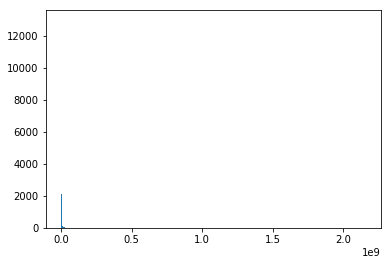

In [342]:
import csv
import matplotlib.pyplot as plt
with open('../rollingsales_manhattan.csv') as f:
    for i in range(5):
        print(f.readline())    
    d = csv.DictReader(f)
    print(d)
    """
    for row in d:
        print(row)
    """
    prices = [int(row[ ' SALE PRICE '].replace(',', '')) for row in d if row[ ' SALE PRICE ' ].replace(',', '').isnumeric()]
    # print(prices)
    plt.hist(prices, bins=1000)
    print(len(prices))

In [8]:
import pandas as pd
import numpy as np

In [16]:
df = pd.DataFrame(np.arange(12).reshape((3, 4)), 
    columns=list('abcd'))
df.loc[1, 'd'] = np.nan
df.loc[2, 'c'] = np.nan
df.dropna(axis=1)

,a,b
0,0,1
1,4,5
2,8,9


In [21]:
df = pd.DataFrame([['a.', 'b.'], ['c.', 'd.']])

In [22]:
df

,0,1
0,a.,b.
1,c.,d.


In [24]:
df[1] = df[1].str.upper().str.replace('.', '!')

In [25]:
df

,0,1
0,a.,B!
1,c.,D!


In [11]:
data = [['2009', '$500'], 
        ['2010', '$1,234'], 
        ['2011', 'WAT!'], 
        ['2012', '$2,507']]
df = pd.DataFrame(data , columns=['date', 'total'])


In [12]:
df

,date,total
0,2009,$500
1,2010,"$1,234"
2,2011,WAT!
3,2012,"$2,507"


In [13]:
df.dtypes

date     object
total    object
dtype: object

In [14]:
total_clean = df['total'].str.replace('$', '').str.replace(',', '')
df['total'] = pd.to_numeric(total_clean, errors='coerce')

In [15]:
df

,date,total
0,2009,500.0
1,2010,1234.0
2,2011,NaN
3,2012,2507.0


Series and Index are equipped with a set of string processing methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically. These are accessed via the str attribute and generally have names matching the equivalent (scalar) built-in string methods:

In [36]:
df = pd.DataFrame([['BAZCO', 'https://baz.edu' ], 
                   ['Foo Inc', 'http://foo.com']],
              columns=['Name', 'URL'])

In [37]:
df

,Name,URL
0,BAZCO,https://baz.edu
1,Foo Inc,http://foo.com


In [38]:
df['URL'].str.split('://', expand=True)

,0,1
0,https,baz.edu
1,http,foo.com


In [39]:
df[['protocol', 'domain']] = df['URL'].str.split('://', expand=True)

In [40]:
df

,Name,URL,protocol,domain
0,BAZCO,https://baz.edu,https,baz.edu
1,Foo Inc,http://foo.com,http,foo.com


In [53]:
df = pd.DataFrame([['foo', -1, 8], 
                   ['foo', 12, 9],
                   ['bar', 3, 7]], columns=list('abc'))

In [54]:
df

,a,b,c
0,foo,-1,8
1,foo,12,9
2,bar,3,7


In [55]:
df = df.replace('foo', 'qux')
df = df.replace(-1, 100)

In [56]:
df

,a,b,c
0,qux,100,8
1,qux,12,9
2,bar,3,7


In [63]:
df = pd.DataFrame(np.arange(9).reshape((3, 3)),
                 columns = ['a', 'b', 'c'])

In [64]:
df.rename(columns=str.upper)

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8


In [65]:
df.rename(columns={'a': 'x', 'c': 'z'})

,x,b,z
0,0,1,2
1,3,4,5
2,6,7,8


In [66]:
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [68]:
df.columns = df.columns.map(str.upper)

In [69]:
df

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8


In [70]:
df.index = [5, 7, 9]

In [71]:
df

,A,B,C
5,0,1,2
7,3,4,5
9,6,7,8


In [73]:
df.columns[2] = 'Z'

TypeError: Index does not support mutable operations

In [104]:
df = pd.DataFrame([[2, 3], [1, 50], [20, 4], [3, 45]])

In [105]:
df

,0,1
0,2,3
1,1,50
2,20,4
3,3,45


In [108]:
(df[1] >  10)

0    False
1     True
2    False
3     True
Name: 1, dtype: bool

In [109]:
df > 10

,0,1
0,False,False
1,False,True
2,True,False
3,False,True


In [110]:
(df > 10).any(1)

0    False
1     True
2     True
3     True
dtype: bool

In [111]:
df[1][df[1] >  10] = 10

In [112]:
df

,0,1
0,2,3
1,1,10
2,20,4
3,3,10


In [113]:
import calendar

In [114]:
s = pd.Series(['Jan 7, 2014', 'May 29, 1993'])

In [115]:
pd.to_datetime(s)

0   2014-01-07
1   1993-05-29
dtype: datetime64[ns]

In [116]:
pd.to_datetime(s).dt.month

0    1
1    5
dtype: int64

In [117]:
pd.to_datetime(s).dt.month_name()

0    January
1        May
dtype: object

In [118]:
pd.to_datetime('2017-02-03', format='%Y %m %d', errors='ignore')

Timestamp('2017-02-03 00:00:00')

In [119]:
import re

In [120]:
re.match('boa', 'banana boat')

In [122]:
re.search('boa', 'banana boat')

<re.Match object; span=(7, 10), match='boa'>

In [121]:
re.match('ban', 'banana boat')

<re.Match object; span=(0, 3), match='ban'>

In [123]:
re.search('an', 'banana boat')

<re.Match object; span=(1, 3), match='an'>

In [124]:
re.findall('an', 'banana boat')

['an', 'an']

In [125]:
m = re.search('o(a(t))', 'banana boat') 
print(m.group(0))
print(m.group(1))
print(m[2])


oat
at
t


In [127]:
re.split('a', 'banana boat')

['b', 'n', 'n', ' bo', 't']

In [129]:
re.sub('an', 'or', 'banana boat')

'borora boat'

In [130]:
re.findall('a\w', 'banana boat blog')

['ba', 'bo', 'bl']

In [132]:
re.findall('a.', 'banana boat blog')

['an', 'an', 'a ', 'at']

In [133]:
re.findall('a[^n]', 'banana boat blog')

['a ', 'at']

In [134]:
re.findall('.an', 'banana boat blog')

['ban']

In [152]:
re.search('(an)*a', 'ana nab a banana')

<re.Match object; span=(0, 3), match='ana'>

In [153]:
re.search('(an){2}a', 'ana nab a banana')

<re.Match object; span=(11, 16), match='anana'>

In [156]:
re.findall('a\w.', 'ana nab a banana')


['ana', 'ab ', 'ana']

In [157]:

re.findall('^a\w.', 'ana nab a banana')

['ana']

In [161]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})


In [162]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [163]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [181]:
a = pd.DataFrame([[2, 20], [4, 40], [6, 60], [8, 80]],
                 columns=['k', 'col1'])
b = pd.DataFrame([[4, 2], [4, 3], [8, 7]], 
                 columns=['k', 'col2'])

In [182]:
a

,k,col1
0,2,20
1,4,40
2,6,60
3,8,80


In [183]:
b

,k,col2
0,4,2
1,4,3
2,8,7


In [185]:
pd.merge(a, b, on='k')

,k,col1,col2
0,4,40,2
1,4,40,3
2,8,80,7


In [188]:
    pd.merge(a, b, on='k', how='outer')

,k,col1,col2
0,2,20,NaN
1,4,40,2.0
2,4,40,3.0
3,6,60,NaN
4,8,80,7.0


In [191]:
a = pd.DataFrame(np.arange(9).reshape((3, 3)),
                columns=list('abc'))
b = pd.DataFrame(np.arange(10, 19).reshape((3, 3)),
                columns=list('abc'))

In [192]:
a

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [193]:
b

,a,b,c
0,10,11,12
1,13,14,15
2,16,17,18


In [196]:
pd.concat([a, b])

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
0,10,11,12
1,13,14,15
2,16,17,18
